In [7]:
import pandas as pd

# CSV 파일 경로
file_path = 'C:/Users/USER/Desktop/인구밀도.csv'
df = pd.read_csv(file_path, encoding="utf-8")

# "소계" 데이터를 가진 행만 필터링
total_data = df[df["동별(3)"] == "소계"]

# 필요한 열만 선택 (자치구, 면적)
result_df = total_data[["동별(2)", "2023.1"]]  # "2023.1"이 면적(km²)에 해당

# 열 이름 변경 (가독성을 위해)
result_df.rename(columns={"동별(2)": "자치구", "2023.1": "면적(km²)"}, inplace=True)

# 결과 확인
print(result_df)


# 결과를 CSV로 저장 (선택 사항)
result_df.to_csv('C:/Users/USER/Desktop/면적.csv', index=False)

      자치구 면적(km²)
1      소계  605.20
2     종로구   23.91
20     중구    9.96
36    용산구   21.87
53    성동구   16.82
71    광진구   17.06
87   동대문구   14.22
102   중랑구   18.50
119   성북구   24.58
140   강북구   23.60
154   도봉구   20.65
169   노원구   35.44
189   은평구   29.71
206  서대문구   17.63
221   마포구   23.85
238   양천구   17.41
257   강서구   41.45
278   구로구   20.12
295   금천구   13.02
306  영등포구   24.55
325   동작구   16.36
341   관악구   29.57
363   서초구   46.97
382   강남구   39.50
405   송파구   33.88
433   강동구   24.59


C:\Users\USER\AppData\Local\Temp\ipykernel_10596\944600999.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df.rename(columns={"동별(2)": "자치구", "2023.1": "면적(km²)"}, inplace=True)


    지역  영유아 및 청소년층    청년층    중년층    장년층    노년층  면적(km²)
1  종로구       16269  39092  29050  36002  29598    23.91
2   중구       12542  33717  28489  30129  26712     9.96
3  용산구       25802  52298  50497  50523  39250    21.87
4  성동구       34300  68303  62993  65964  50825    16.82
5  광진구       39197  98911  72466  79715  59018    17.06
<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역          25 non-null     object 
 1   영유아 및 청소년층  25 non-null     int64  
 2   청년층         25 non-null     int64  
 3   중년층         25 non-null     int64  
 4   장년층         25 non-null     int64  
 5   노년층         25 non-null     int64  
 6   면적(km²)     25 non-null     float64
dtypes: float64(1), int64(5), object(1)
memory usage: 1.6+ KB
None
         영유아 및 청소년층           청년층            중년층            장년층  \
count     25.000000      25.00000      25.000000      25.000000 

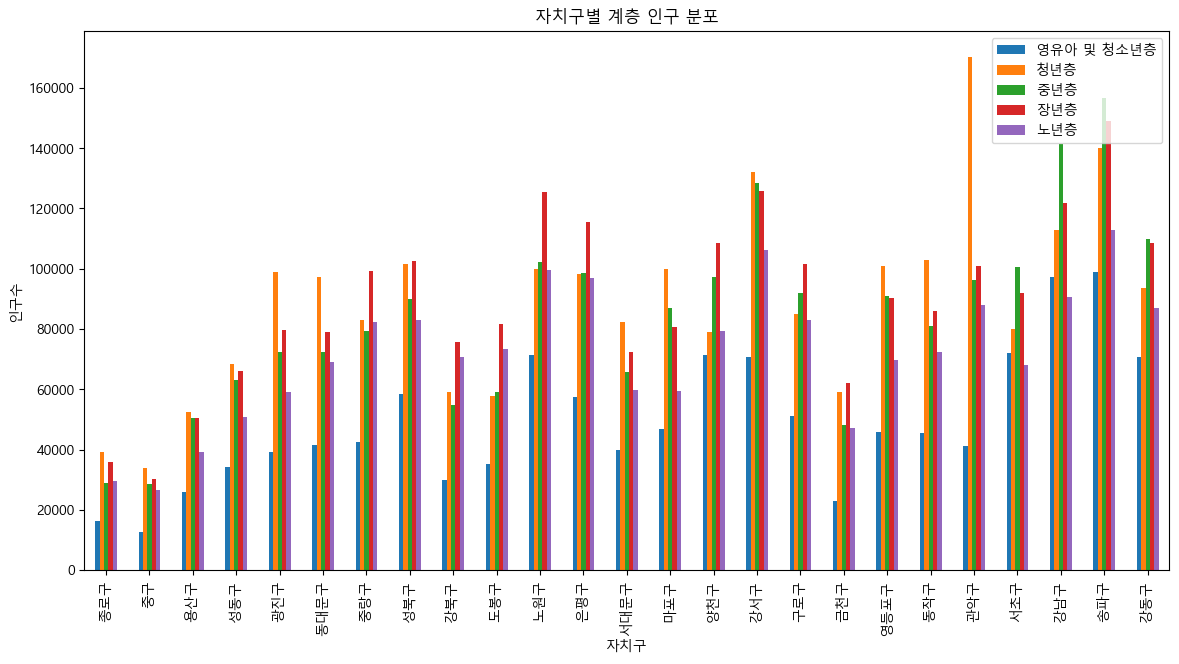

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
file_path = 'C:/Users/USER/Desktop/people.csv'
df = pd.read_csv(file_path, encoding="euc-kr")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"]

# 1. 데이터 구조 확인
print(df_filtered.head())
print(df_filtered.info())

# 2. 통계 요약
print(df_filtered.describe())

# 3. 지역별 상위 10개 (중장년층 기준)
top_regions = df_filtered.sort_values(by="중년층", ascending=False).head(10)
print(top_regions)

# 4. 시각화 - 지역별 계층 인구 분포
df_filtered.plot(x="지역", y=["영유아 및 청소년층", "청년층", "중년층","장년층", "노년층"], kind="bar", figsize=(14, 7))
plt.title("자치구별 계층 인구 분포")
plt.xlabel("자치구")
plt.ylabel("인구수")
plt.legend(loc="upper right")
plt.show()



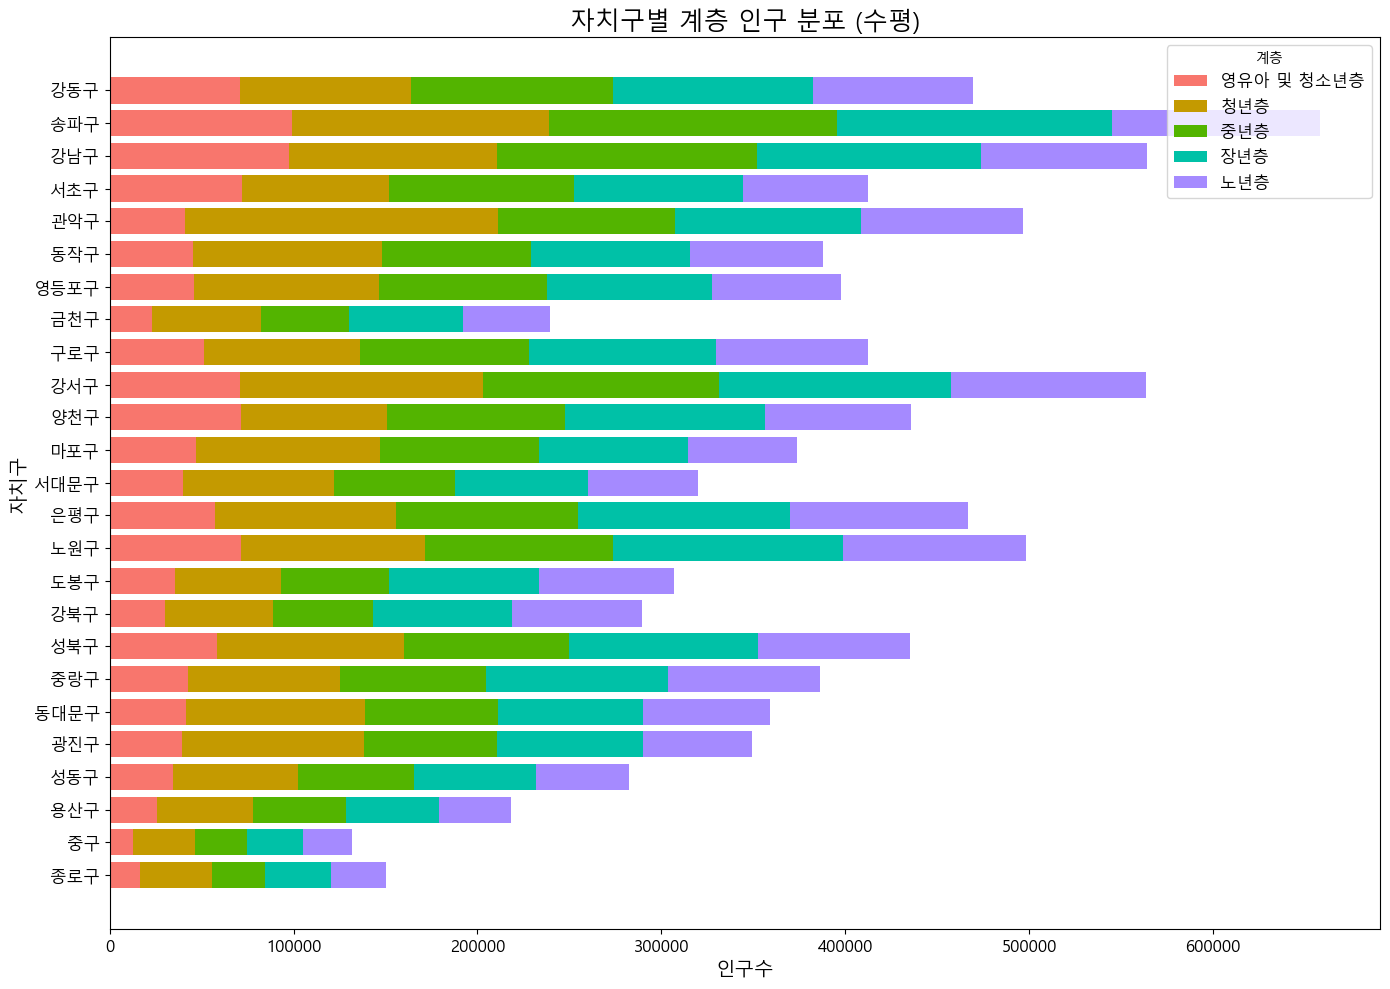

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
# file_path = 'C:/Users/USER/Desktop/people.csv'
# df = pd.read_csv(file_path, encoding="euc-kr")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"]

# Pubr 색상 팔레트
# pubr_colors = ["#F8766D", "#C49A00", "#53B400", "#00C1A7", "#A58AFF"]
# 색상 간소화 (단순한 색상)
simple_colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99"]

# 시각화 - 지역별 계층 인구 분포 (수평 쌓은 막대그래프)
fig, ax = plt.subplots(figsize=(14, 10))

# 데이터 쌓기용 설정
categories = ["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"]
bottom = None

for idx, category in enumerate(categories):
    ax.barh(
        df_filtered["지역"],
        df_filtered[category],
        label=category,
        color=pubr_colors[idx],
        left=bottom,  # 쌓는 위치 설정
    )
    bottom = (df_filtered[category] if bottom is None else bottom + df_filtered[category])

# 제목 및 레이블
plt.title("자치구별 계층 인구 분포 (수평)", fontsize=18)
plt.xlabel("인구수", fontsize=14)
plt.ylabel("자치구", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="계층", loc="upper right", fontsize=12)
plt.tight_layout()

plt.show()


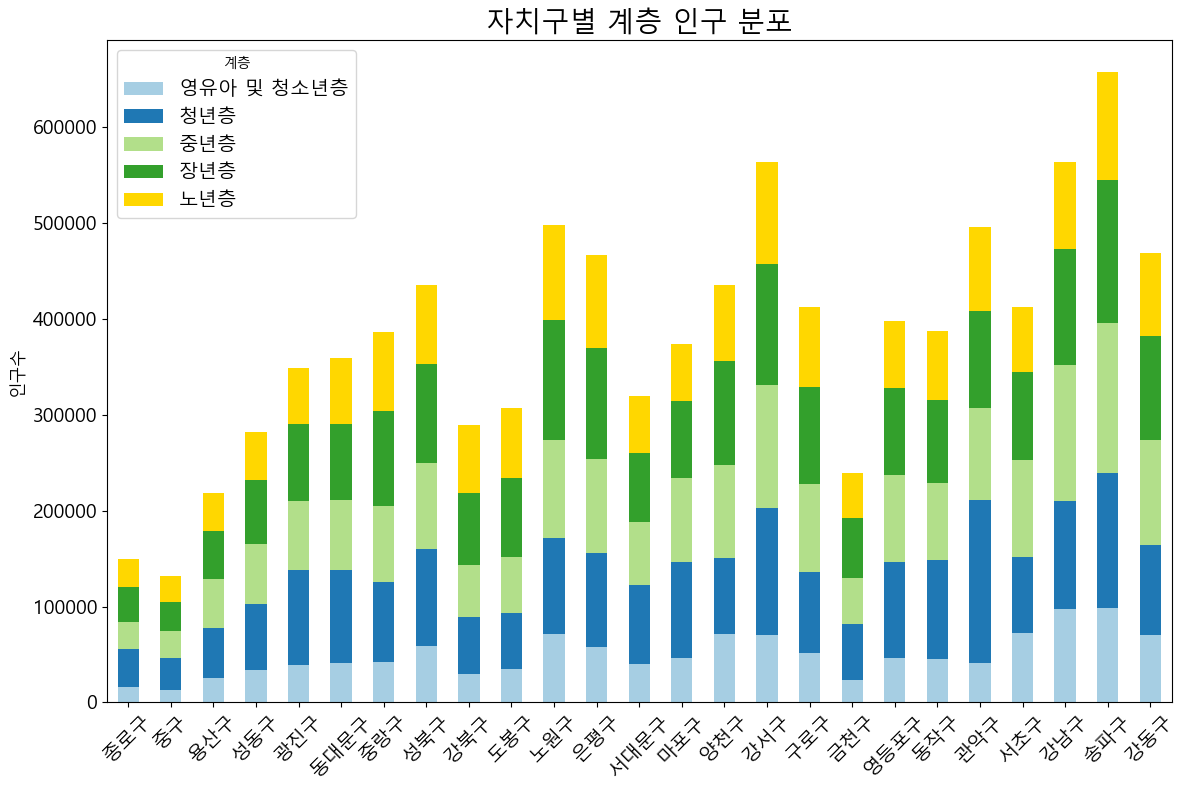

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
file_path = 'C:/Users/USER/Desktop/people.csv'
df = pd.read_csv(file_path, encoding="euc-kr")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"]

# 색상 간소화 (단순한 색상)
simple_colors = ["#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "gold"]

# 시각화 - 지역별 계층 인구 분포
fig, ax = plt.subplots(figsize=(12, 8))

df_filtered.plot(
    x="지역", 
    y=["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"], 
    kind="bar", 
    stacked=True,  # 쌓은 막대그래프
    color=simple_colors, 
    figsize=(12, 8),
    ax=ax
)

# 제목 및 레이블 설정
plt.title("자치구별 계층 인구 분포", fontsize=20)
plt.xlabel("", fontsize=12)
plt.ylabel("인구수", fontsize=12)
plt.legend(title="계층", loc="upper left", fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()

plt.show()


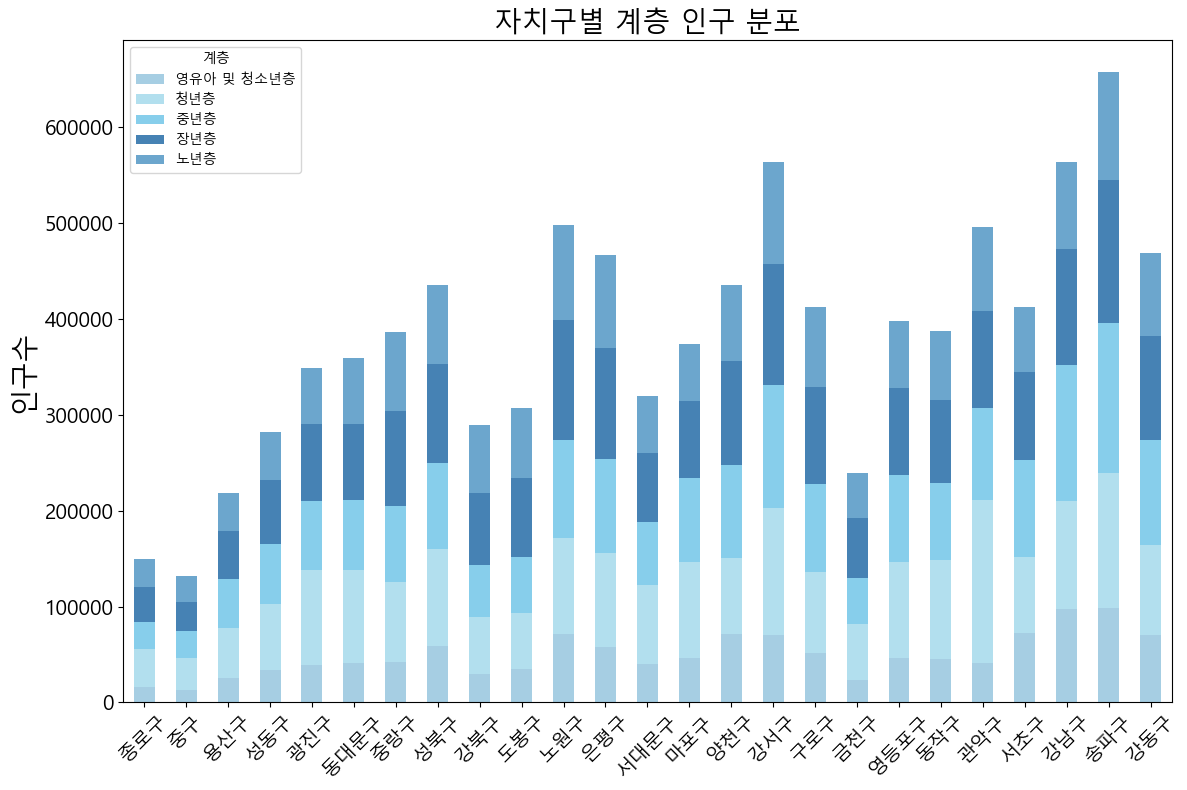

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
file_path = 'C:/Users/USER/Desktop/people.csv'
df = pd.read_csv(file_path, encoding="euc-kr")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"]

# 남색 계열의 파스텔 색상
pastel_blue_colors = ["#A6CEE3", "#B2DFEE", "#87CEEB", "#4682B4", "#6CA6CD"]

# 시각화 - 지역별 계층 인구 분포
fig, ax = plt.subplots(figsize=(12, 8))

df_filtered.plot(
    x="지역", 
    y=["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"], 
    kind="bar", 
    stacked=True,  # 쌓은 막대그래프
    color=pastel_blue_colors, 
    figsize=(12, 8),
    ax=ax
)

# 제목 및 레이블 설정
plt.title("자치구별 계층 인구 분포", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("인구수", fontsize=20)
plt.legend(title="계층", loc="upper left", fontsize=10)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()


      지역  영유아 및 청소년층     청년층     중년층     장년층     노년층  면적(km²)     총인구  \
6   동대문구       41356   97280   72457   79060   69066    14.22  359219   
15   양천구       71411   79162   97265  108652   79377    17.41  435867   
20   동작구       45384  102893   81099   85945   72471    16.36  387792   
7    중랑구       42367   83018   79364   99134   82248    18.50  386131   
17   구로구       51246   85102   91794  101454   82845    20.12  412441   
5    광진구       39197   98911   72466   79715   59018    17.06  349307   
24   송파구       99008  140114  156683  149171  113015    33.88  657991   
25   강동구       70560   93513  109874  108501   87016    24.59  469464   
18   금천구       23012   59086   48162   62010   47307    13.02  239577   
13  서대문구       39707   82313   65738   72209   59782    17.63  319749   

            인구밀도  
6   25261.533052  
15  25035.439403  
20  23703.667482  
7   20871.945946  
17  20499.055666  
5   20475.205158  
24  19421.221960  
25  19091.663278  
18  18400.691244  
13  18

C:\Users\USER\AppData\Local\Temp\ipykernel_19744\2639542824.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["총인구"] = df_filtered[["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"]].sum(axis=1)
C:\Users\USER\AppData\Local\Temp\ipykernel_19744\2639542824.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["인구밀도"] = df_filtered["총인구"] / df_filtered["면적(km²)"]


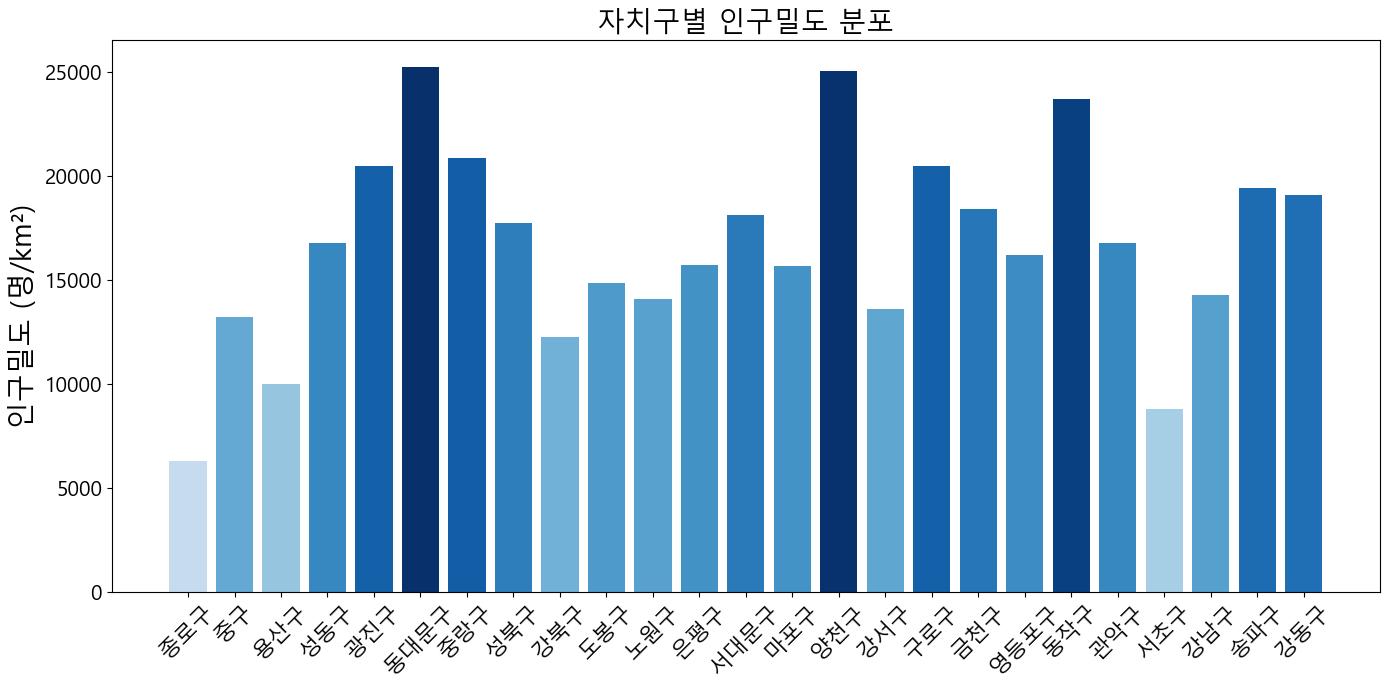

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
file_path = 'C:/Users/USER/Desktop/people.csv'
df = pd.read_csv(file_path, encoding="euc-kr")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"]

# 총 인구수 계산
df_filtered["총인구"] = df_filtered[["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"]].sum(axis=1)

# 인구밀도 계산 (총인구 / 면적)
df_filtered["인구밀도"] = df_filtered["총인구"] / df_filtered["면적(km²)"]

# 1. 인구밀도 상위 10개 지역
top_density = df_filtered.sort_values(by="인구밀도", ascending=False).head(10)
print(top_density)

# 2. 시각화 - 인구밀도 분포
colors = cm.Blues(df_filtered["인구밀도"] / df_filtered["인구밀도"].max())  # 파란색 계열 그라데이션
plt.figure(figsize=(14, 7))
plt.bar(df_filtered["지역"], df_filtered["인구밀도"], color=colors)
plt.title("자치구별 인구밀도 분포", fontsize=20)
plt.xlabel("", fontsize=12)
plt.ylabel("인구밀도 (명/km²)", fontsize=20)
plt.xticks(rotation=45, fontsize = 16)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_20632\482951529.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["총인구"] = df_filtered[["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"]].sum(axis=1)
C:\Users\USER\AppData\Local\Temp\ipykernel_20632\482951529.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["인구밀도"] = df_filtered["총인구"] / df_filtered["면적(km²)"]


      지역  영유아 및 청소년층     청년층     중년층     장년층     노년층  면적(km²)     총인구  \
6   동대문구       41356   97280   72457   79060   69066    14.22  359219   
15   양천구       71411   79162   97265  108652   79377    17.41  435867   
20   동작구       45384  102893   81099   85945   72471    16.36  387792   
7    중랑구       42367   83018   79364   99134   82248    18.50  386131   
17   구로구       51246   85102   91794  101454   82845    20.12  412441   
5    광진구       39197   98911   72466   79715   59018    17.06  349307   
24   송파구       99008  140114  156683  149171  113015    33.88  657991   
25   강동구       70560   93513  109874  108501   87016    24.59  469464   
18   금천구       23012   59086   48162   62010   47307    13.02  239577   
13  서대문구       39707   82313   65738   72209   59782    17.63  319749   

            인구밀도  
6   25261.533052  
15  25035.439403  
20  23703.667482  
7   20871.945946  
17  20499.055666  
5   20475.205158  
24  19421.221960  
25  19091.663278  
18  18400.691244  
13  18

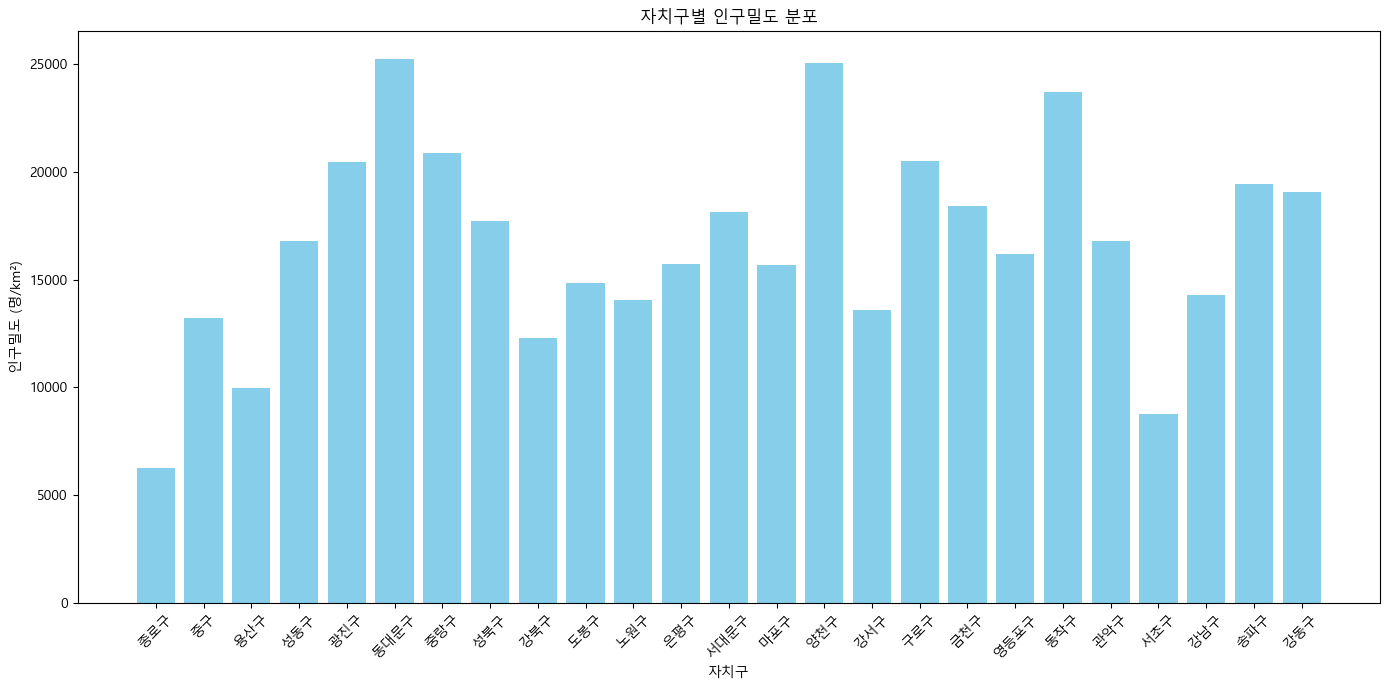

인구밀도가 추가된 파일이 저장되었습니다: C:/Users/USER/Desktop/people_with_density.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
file_path = 'C:/Users/USER/Desktop/people.csv'
df = pd.read_csv(file_path, encoding="euc-kr")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"]

# 총 인구수 계산
df_filtered["총인구"] = df_filtered[["영유아 및 청소년층", "청년층", "중년층", "장년층", "노년층"]].sum(axis=1)

# 인구밀도 계산 (총인구 / 면적)
df_filtered["인구밀도"] = df_filtered["총인구"] / df_filtered["면적(km²)"]

# 1. 인구밀도 상위 10개 지역
top_density = df_filtered.sort_values(by="인구밀도", ascending=False).head(10)
print(top_density)

# 2. 시각화 - 인구밀도 분포
plt.figure(figsize=(14, 7))
plt.bar(df_filtered["지역"], df_filtered["인구밀도"], color="skyblue")
plt.title("자치구별 인구밀도 분포")
plt.xlabel("자치구")
plt.ylabel("인구밀도 (명/km²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 인구밀도가 추가된 데이터를 새로운 CSV 파일로 저장
output_file_path = 'C:/Users/USER/Desktop/people_with_density.csv'
df_filtered.to_csv(output_file_path, encoding="utf-8", index=False)
print(f"인구밀도가 추가된 파일이 저장되었습니다: {output_file_path}")


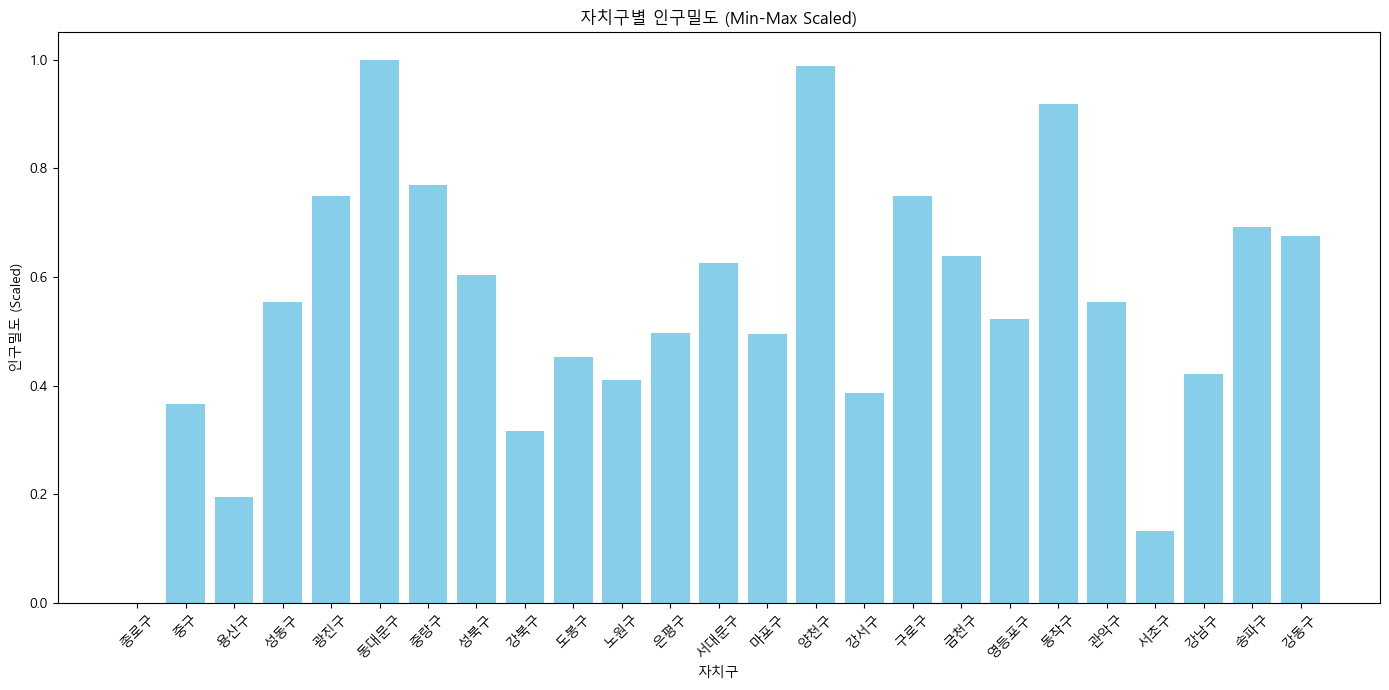

In [2]:
# 파일 읽기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 한국어 폰트 설정
plt.rcParams["font.family"] = "Malgun Gothic"  # 맑은 고딕
plt.rcParams["axes.unicode_minus"] = False    # 마이너스 기호 문제 방지

# CSV 파일 읽기
file_path = 'C:/Users/USER/Desktop/people_with_density.csv'

df = pd.read_csv(file_path, encoding="utf-8")

# "합계" 행 제거
df_filtered = df[df["지역"] != "합계"].copy()

# Min-Max Scaling 적용 (인구밀도)
scaler = MinMaxScaler()
df_filtered["인구밀도_scaled"] = scaler.fit_transform(df_filtered[["인구밀도"]])

# 시각화
plt.figure(figsize=(14, 7))
plt.bar(df_filtered["지역"], df_filtered["인구밀도_scaled"], color="skyblue")
plt.title("자치구별 인구밀도 (Min-Max Scaled)")
plt.xlabel("자치구")
plt.ylabel("인구밀도 (Scaled)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


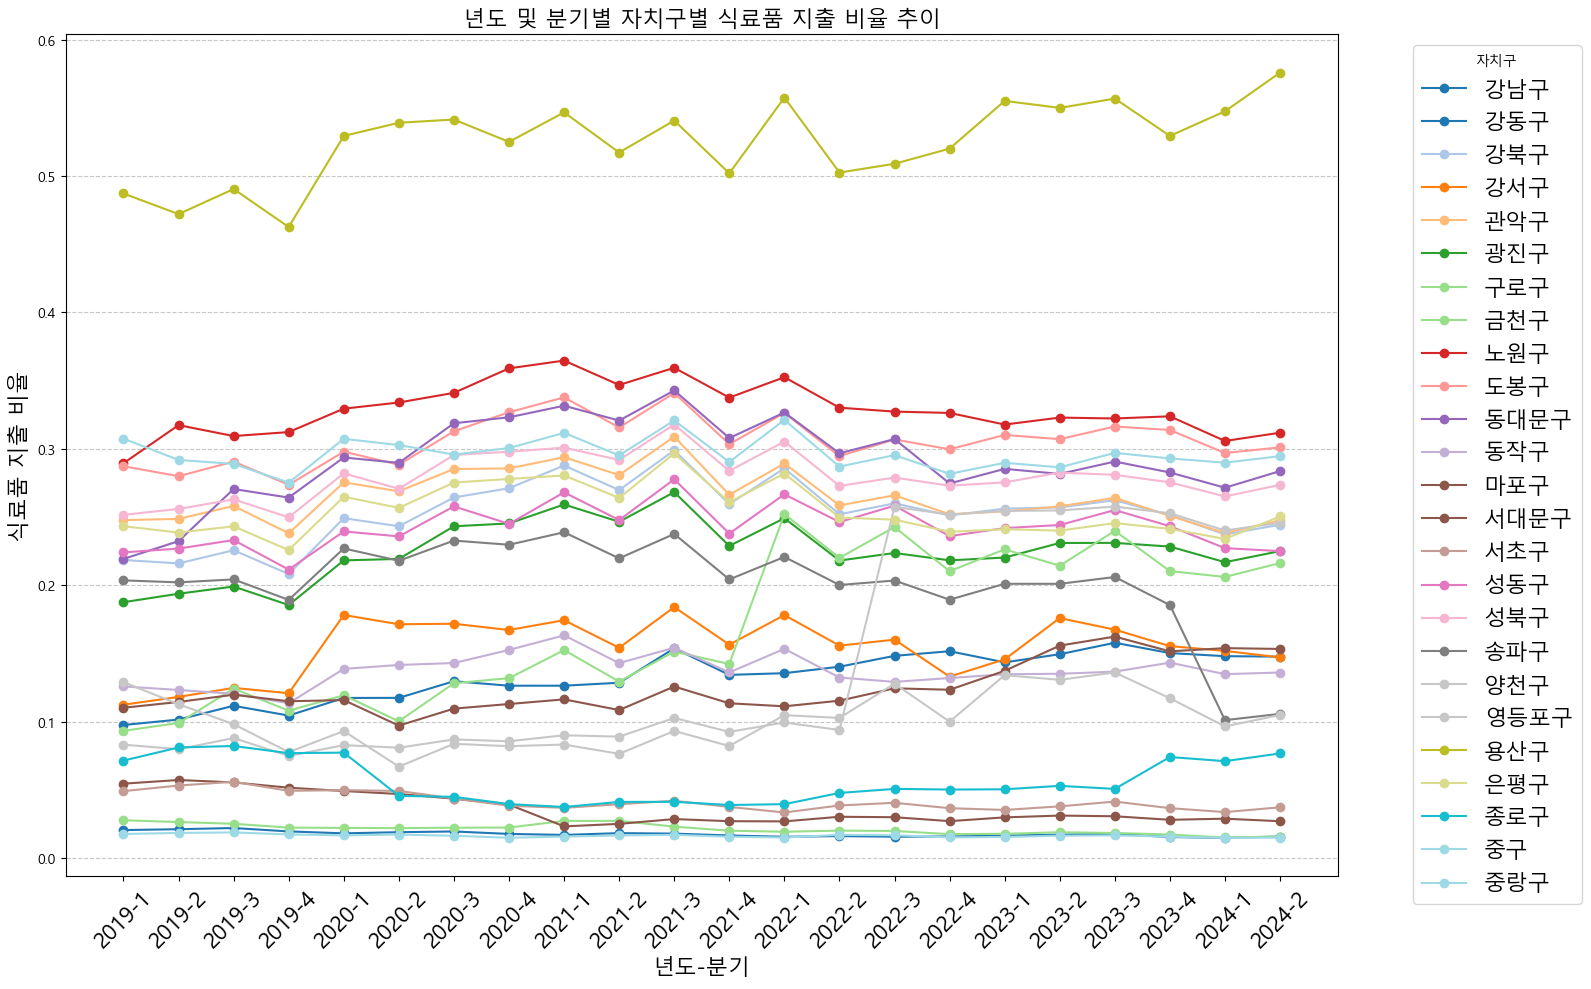

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 불러오기
file_path = 'C:/Users/USER/Desktop/서울시 상권분석서비스(소득소비-자치구).csv'
data = pd.read_csv(file_path, encoding='cp949')

# 데이터 전처리: 필요한 열 추출 및 년도와 분기 분리
data['기준_년도'] = data['기준_년분기_코드'].astype(str).str[:4]
data['기준_분기'] = data['기준_년분기_코드'].astype(str).str[4:]

# 소득 대비 식료품 지출 비율 계산
data['식료품_지출_비율'] = data['식료품_지출_총금액'] / data['지출_총금액']

# 시각화를 위한 데이터 집계: 자치구별 년도, 분기별 평균 식료품 지출 비율 계산
pivot_data = data.groupby(['행정동_코드_명', '기준_년도', '기준_분기'])['식료품_지출_비율'].mean().reset_index()

# 자치구 목록 추출
districts = pivot_data['행정동_코드_명'].unique()

# 컬러맵 생성 (각 자치구별 고유 색상 지정)
num_colors = len(districts)
colors = plt.cm.tab20(np.linspace(0, 1, num_colors))  # tab20 컬러맵 사용

# 시각화: 선 그래프
plt.figure(figsize=(16, 10))

for i, district in enumerate(districts):
    district_data = pivot_data[pivot_data['행정동_코드_명'] == district]
    plt.plot(
        district_data['기준_년도'] + "-" + district_data['기준_분기'],  # x축: 년도와 분기 결합
        district_data['식료품_지출_비율'],
        label=district,
        color=colors[i],
        marker='o'
    )

# 그래프 설정
plt.title('년도 및 분기별 자치구별 식료품 지출 비율 추이', fontsize=16)
plt.xlabel('년도-분기', fontsize=16)
plt.ylabel('식료품 지출 비율', fontsize=16)
plt.xticks(rotation=45, fontsize=16)
plt.legend(title='자치구', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


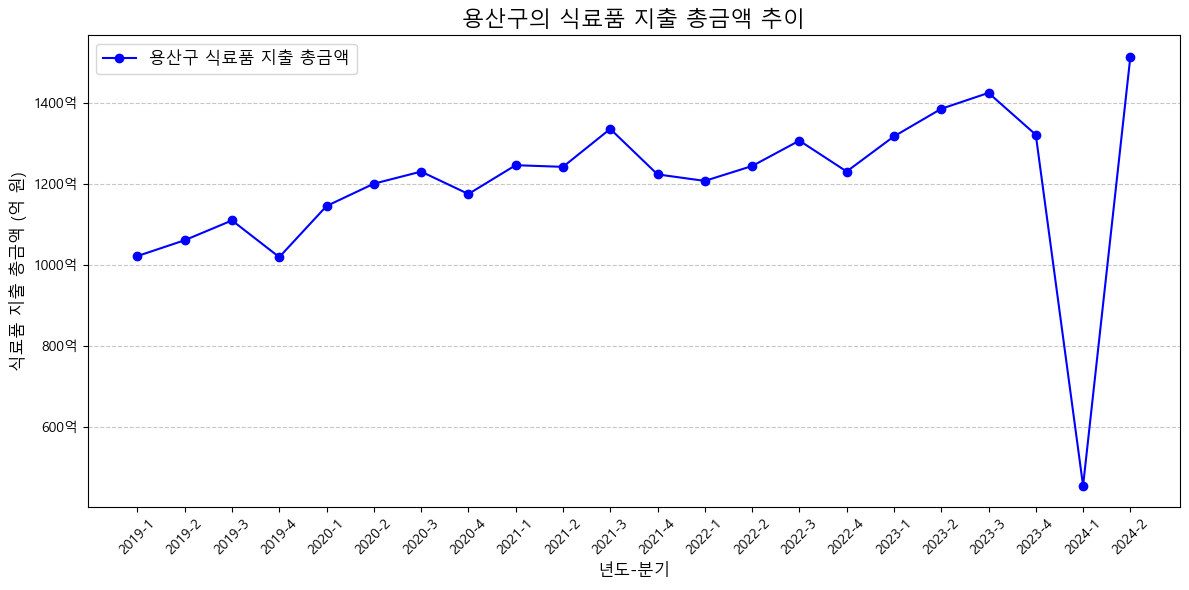

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# CSV 파일 불러오기
file_path = 'C:/Users/USER/Desktop/서울시 상권분석서비스(소득소비-자치구).csv'
data = pd.read_csv(file_path, encoding='cp949')

# 데이터 전처리: 필요한 열 추출 및 년도와 분기 분리
data['기준_년도'] = data['기준_년분기_코드'].astype(str).str[:4]
data['기준_분기'] = data['기준_년분기_코드'].astype(str).str[4:]

# 특정 자치구 선택 (예: '용산구')
target_district = '용산구'
filtered_data = data[data['행정동_코드_명'] == target_district]

# 시각화를 위한 데이터 집계
pivot_data = filtered_data.groupby(['기준_년도', '기준_분기'])['식료품_지출_총금액'].sum().reset_index()

# 년도-분기 컬럼 추가 (시각화를 위해 결합)
pivot_data['년도-분기'] = pivot_data['기준_년도'] + "-" + pivot_data['기준_분기']

# 금액 단위를 억 원으로 변환
pivot_data['식료품_지출_총금액'] = pivot_data['식료품_지출_총금액'] / 1e8

# y축 포맷 설정 함수
def billions(x, pos):
    return f'{int(x)}억'

formatter = FuncFormatter(billions)

# 시각화: 선 그래프
plt.figure(figsize=(12, 6))
plt.plot(
    pivot_data['년도-분기'], 
    pivot_data['식료품_지출_총금액'], 
    marker='o', 
    color='blue', 
    label=f'{target_district} 식료품 지출 총금액'
)

# 그래프 설정
plt.title(f'{target_district}의 식료품 지출 총금액 추이', fontsize=16)
plt.xlabel('년도-분기', fontsize=12)
plt.ylabel('식료품 지출 총금액 (억 원)', fontsize=12)
plt.gca().yaxis.set_major_formatter(formatter)  # y축에 포맷 적용
plt.xticks(rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


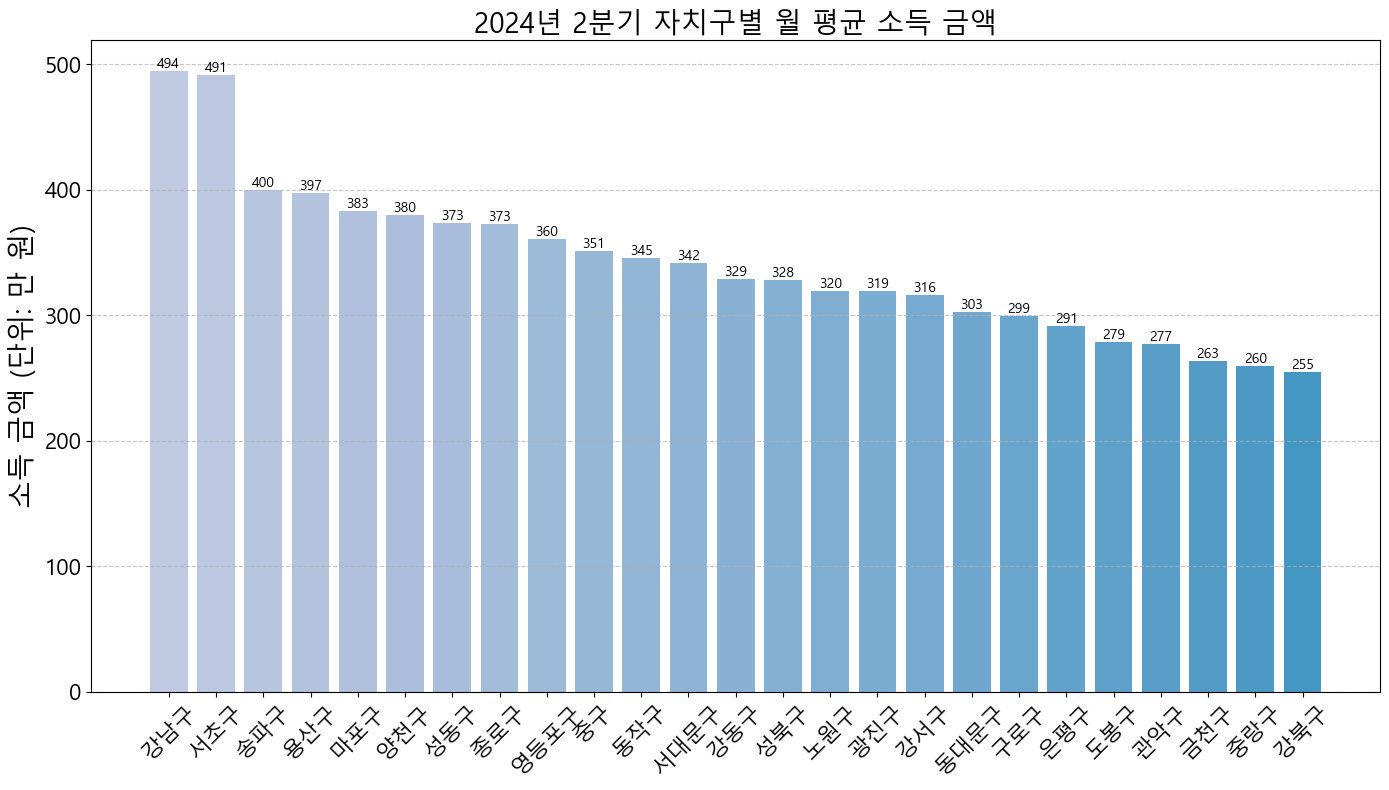

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 불러오기
file_path = 'C:/Users/USER/Desktop/서울시 상권분석서비스(소득소비-자치구).csv'
data = pd.read_csv(file_path, encoding='cp949')

# 데이터 전처리: 필요한 열 추출 및 년도와 분기 분리
data['기준_년도'] = data['기준_년분기_코드'].astype(str).str[:4]
data['기준_분기'] = data['기준_년분기_코드'].astype(str).str[4:]

# 20242(2024년 2분기) 데이터 필터링
filtered_data = data[(data['기준_년도'] == '2024') & (data['기준_분기'] == '2')]

# 시각화를 위한 데이터 집계
pivot_data = filtered_data.groupby('행정동_코드_명')['월_평균_소득_금액'].mean().reset_index()

# 정렬 (소득 금액 기준으로 내림차순)
pivot_data = pivot_data.sort_values(by='월_평균_소득_금액', ascending=False)

# 컬러맵 생성 (Blues, 값이 적은 것부터 파란색이 강조되도록 반전)
colors = plt.cm.PuBu(np.linspace(0.3, 0.9, len(pivot_data)))

# 시각화: 세로 막대 그래프
plt.figure(figsize=(14, 8))
bars = plt.bar(
    pivot_data['행정동_코드_명'], 
    pivot_data['월_평균_소득_금액'] / 1e4,  # 만 원 단위로 변환
    color=colors
)

# y축 단위 조정
plt.title('2024년 2분기 자치구별 월 평균 소득 금액', fontsize=20)
plt.xlabel('', fontsize=12)
plt.ylabel('소득 금액 (단위: 만 원)', fontsize=20)

# x축 레이블 설정
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)

# 격자선 추가
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 레이블 추가 (값 표시)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
